In [1]:
import numpy as np
from mpl_toolkits import mplot3d
from cntxt import rom_am
from rom_am import ROM
import matplotlib.pyplot as plt
from heat import FEM

## **Application à l'équation des ondes:**
Heat equation on [0,1] and $$ t \in [0,T]$$
$$ \partial_t u(x,t) -\kappa \Delta u(x,t) = 0$$
where : $$u_x(0,t)=q(t)$$,
$$u_{x}(1,t)=0$$
and $$u_{x}(x,0)=u_{ini}$$

In [2]:
N = 60
Nt = 100
length = 1
T = 30
fea = FEM(N , Nt, length, T, kappa = 0.02)
neumann = lambda t : np.sin(np.pi * t)
t_ini = np.zeros(N+1)
U = fea.solve(t_ini = t_ini, neumann = neumann)

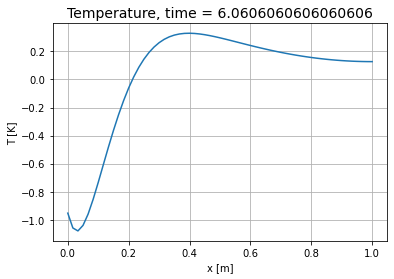

In [3]:
t = 20
plt.plot(np.linspace(0, 1, N + 1), U[:, t]);
plt.title('Temperature, time = {}'.format(t * fea.dt) , fontsize=14);
plt.ylabel("T [K]");
plt.xlabel("x [m]");
plt.grid()

In [4]:
X = U[:, :-1]
Y = U[:, 1::]

Y_input = np.zeros((1, Nt-1))
for i in range(Nt-1):
    Y_input[:, i] = neumann(i * (length/Nt))

### Construction de l'opérateur DMD:

In [5]:
dmd_c = ROM("dmdc")
dmd_c.decompose(X, Y, Y_input, length/Nt, )

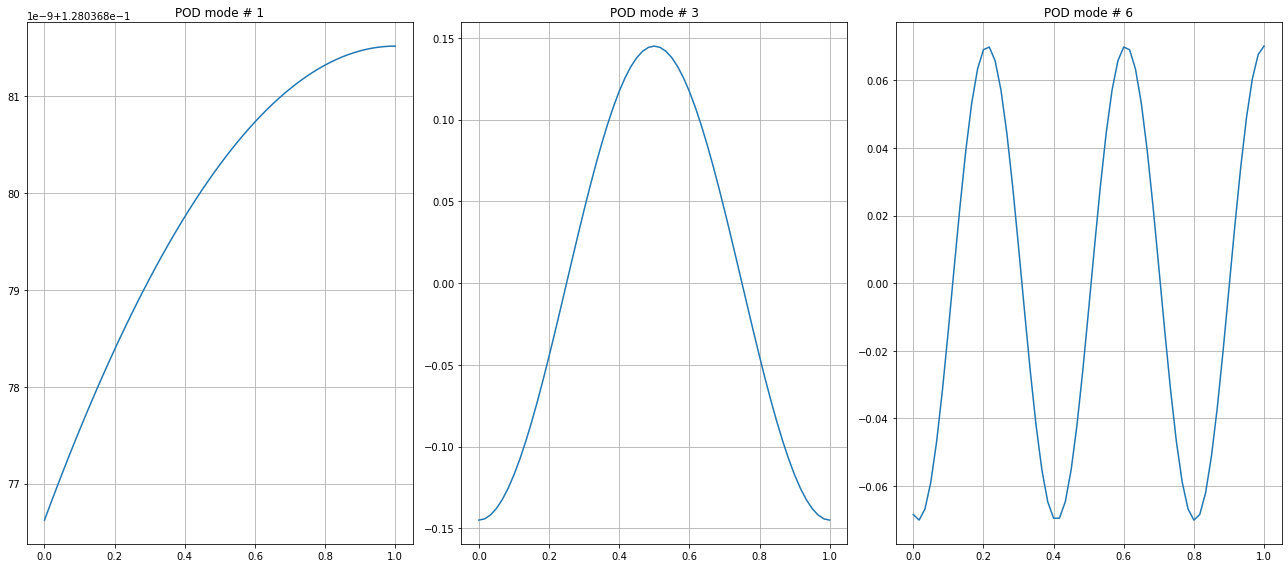

In [6]:
n_mode = [0, 2, 5]

fig, ax  = plt.subplots(1, 3, figsize = (18, 8))

for i in range(len(n_mode)):
    
    modes = np.real(dmd_c.dmd_modes[:, n_mode[i]].copy())
    ax[i].plot(np.linspace(0, 1, N + 1), modes,);
    ax[i].grid();
    ax[i].set_title("POD mode # {}" .format(n_mode[i]+1));

fig.tight_layout();

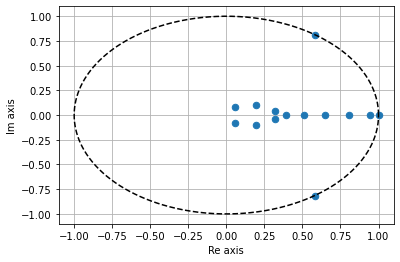

In [9]:
plt.plot(np.real(dmd_c.lambd), np.imag(dmd_c.lambd), '.', markersize = 13);
plt.xlabel("Re axis");
plt.ylabel("Im axis");
theta = np.linspace(0, 2*np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--");
plt.grid();

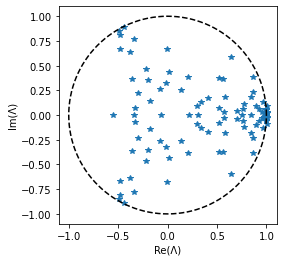

In [32]:
# Distribution des valeurs propres DMD 



fig, ax = plt.subplots(1, 1)

ax.plot(Λ_.real, Λ_.imag, "*")


θ = np.linspace(0, 2*np.pi, 1024)
ax.plot(np.cos(θ), np.sin(θ), "k--")

ax.set_aspect("equal")
ax.set(xlabel="Re(Λ)", ylabel="Im(Λ)");
plt.show()

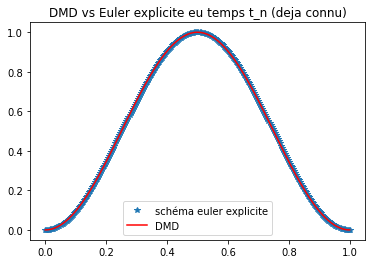

In [33]:
X=np.linspace(0,1,(N+1))
plt.plot(X,X_wave[:-N-1,Nt-1],'*',label='schéma euler explicite')
plt.plot(X,Z[:-N-1,Nt-3],'r',label='DMD')
plt.legend()
plt.title('DMD vs Euler explicite eu temps t_n (deja connu)')
plt.show()

# **Application à l'écoulement à travers un cylindre:**

In [34]:
import scipy.io
import numpy as np
mat = scipy.io.loadmat('CYLINDER_ALL.mat')

In [35]:
#construction des matrices de données 
UALL=mat['UALL']
VALL=mat['VALL']
VORTALL=mat['VORTALL']
X_u=np.zeros((int(np.shape(VORTALL)[0]/2),np.shape(VORTALL)[1]))
X_v=np.zeros((int(np.shape(VORTALL)[0]/2),np.shape(VORTALL)[1]))
for i in range(int(np.shape(VORTALL)[0]/2)):
    X_u[i,:]=UALL[2*i,:]
    X_v[i,:]=VALL[2*i,:]

In [36]:
#Application de la DMD à la vélocité u
tp3=time.clock()
Temp_, Λ_geneig_, Opt, A_ = rrr_dmd(X_u, 151, 
            opt_rank=lambda mx, nx, Σx : len(Σx),                                   
            factorization='evd')
Ψ, Λ, Φ = Temp_[0], Temp_[1], Temp_[2]
tp=time.clock()
print("temps de constrcution de l'opérateur DMD de rang r,  =",tp-tp3, "secondes")

temps de constrcution de l'opérateur DMD de rang r,  = 18.93165829999998 secondes


In [37]:
#Je l'ai pas utilisé 
A=(Ψ@ (np.diag(Λ)) @ Φ.T)

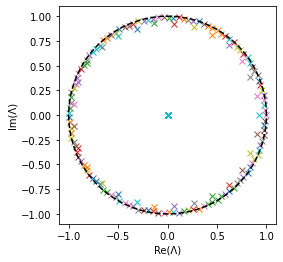

In [38]:
# Distribution des valeurs propres DMD 
fig, ax = plt.subplots(1, 1)
ax.plot(np.diag(Λ).real, np.diag(Λ).imag, "x")

θ = np.linspace(0, 2*np.pi, 1024)
ax.plot(np.cos(θ), np.sin(θ), "k--")

ax.set_aspect("equal")
ax.set(xlabel="Re(Λ)", ylabel="Im(Λ)");
plt.show()

In [39]:
tp=time.clock()
X_u_1=X_u[:, :-1]
X_u_2=np.dot(A_,X_u_1)
tp2=time.clock()
print(tp2-tp)

13.752633400000036


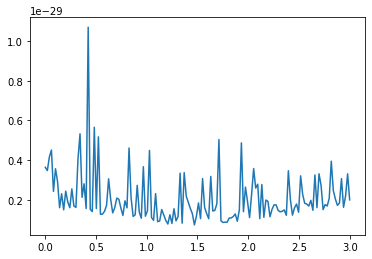

In [40]:
#Erreur Sim et DMD 
N=np.shape(X_u)[0]
Nt=np.shape(X_u)[1]
Err=[]
X_u_T = np.delete(X_u, (0), axis=1)
for i in range(Nt-1):
    Err.append(np.linalg.norm(X_u_T[:,i]-X_u_2[:,i])**2/np.linalg.norm(X_u_T[:,i])**2)

plt.plot(np.linspace(0,3,Nt-1),Err)
plt.show()

---